In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
import seaborn as sns
%matplotlib inline

In [16]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
tree_loan_cols = ['Gender', 'Married', 'Education',
                  'Self_Employed','ApplicantIncome', 'LoanAmount','Property_Area', 'Loan_Status']
tree_loan = loan[tree_loan_cols]
tree_loan.isnull().sum().sort_values(ascending=False)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(np.array(tree_loan.loc[:, 'LoanAmount']).reshape(-1,1))
tree_loan.loc[:,'LoanAmount'] = imputer.transform(np.array(tree_loan.loc[:, 'LoanAmount']).reshape(-1,1))
imputer_clf = SimpleImputer(strategy='most_frequent')
clf_imputer = imputer_clf.fit_transform(tree_loan.drop(columns=['LoanAmount', 'ApplicantIncome'], axis=1))
tree_loan.loc[:, 'Gender'] = clf_imputer[:,0]
tree_loan.loc[:,'Married'] = clf_imputer[:,1]
tree_loan.loc[:,'Education'] = clf_imputer[:,2]
tree_loan.loc[:,'Self_Employed'] = clf_imputer[:,3]
tree_loan.loc[:,'Property_Area'] = clf_imputer[:,4]
tree_loan.loc[:,'Loan_Status'] = clf_imputer[:,5]
X = tree_loan.iloc[:, :7]
Y = tree_loan.iloc[:, 7]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=22)
x_cat= pd.get_dummies(x_train, drop_first=True)
x_test_cat = pd.get_dummies(x_test, drop_first=True)
print(x_cat.shape)
x_cat.head()

(429, 8)


c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ApplicantIncome,LoanAmount,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
278,14583,436.0,1,1,0,0,1,0
507,3583,96.0,1,0,0,0,0,1
430,8624,150.0,0,0,0,1,1,0
58,8080,180.0,1,1,0,0,0,1
538,2917,66.0,1,1,1,0,0,0


In [21]:
rf = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=3, criterion='entropy', oob_score=True) #max_features=none,log2,auto
rf.fit(x_cat, y_train)
pred_rf = rf.predict(x_test_cat)
print("RF Training score: ", rf.score(x_cat, y_train))
print("RF OOB score: ", rf.oob_score_)
print("RF Accuracy score: ", accuracy_score(y_test, pred_rf))

RF Training score:  0.6783216783216783
RF OOB score:  0.668997668997669
RF Accuracy score:  0.7027027027027027


[0.22910383 0.33014431 0.03337207 0.11015714 0.0458415  0.03009338
 0.18353866 0.0377491 ]


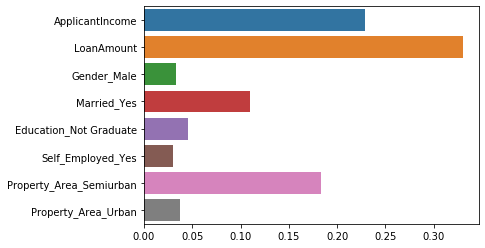

In [24]:
#Feature importances
print(rf.feature_importances_)
sns.barplot(rf.feature_importances_, x_cat.columns)

In [25]:
# Stats about the trees in random forest
n_nodes = []
max_depths = []
for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 13
Average maximum depth 3


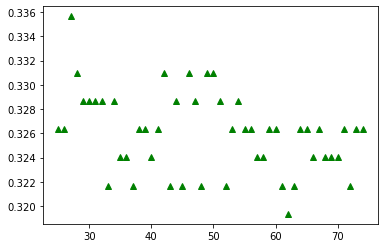

In [27]:
#oob
rf1 = RandomForestClassifier(max_features='sqrt', max_depth=3, criterion='entropy', oob_score=True) #max_features=none,log2,auto
for i in range(25, 75):
    rf1.set_params(n_estimators=i)
    rf1.fit(x_cat, y_train)
    oob_error = 1 - rf1.oob_score_
    plt.plot(i, oob_error, 'g^')